Loading modules and funcions

In [ ]:
import datascience
import numpy as np
import pandas as pd

from datascience import *
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn import metrics


Loading data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path= "/content/drive/My Drive/DS 402/New_Data.csv"
data = pd.read_csv(path)
data.head(5)

,Age,Course,Gender,CGPA,Stress_Level,Depression_Score,Anxiety_Score,Sleep_Quality,Physical_Activity,Diet_Quality,Social_Support,Relationship_Status,Substance_Use,Counseling_Service_Use,Family_History,Chronic_Illness,Financial_Stress,Extracurricular_Involvement,Semester_Credit_Load,Residence_Type
0,25,Others,Male,3.56,3,3,2,Good,Moderate,Good,Moderate,Married,Never,Never,No,No,2,Moderate,17,On-Campus
1,24,Engineering,Female,2.44,0,3,0,Average,Low,Average,Low,Single,Occasionally,Occasionally,No,No,3,Low,27,On-Campus
2,19,Business,Female,3.74,4,0,3,Good,Low,Average,Moderate,In a Relationship,Never,Occasionally,No,No,4,High,15,On-Campus
3,19,Computer Science,Male,3.65,2,1,0,Average,Low,Average,Moderate,Single,NaN,Never,No,No,4,Moderate,20,Off-Campus
4,18,Business,Male,3.40,3,3,4,Good,Low,Average,High,Married,Never,Never,No,Yes,0,High,23,On-Campus


data preprocessing

In [ ]:
data.isna().sum()

,0
Age,0
Course,0
Gender,0
CGPA,12
Stress_Level,0
Depression_Score,0
Anxiety_Score,0
Sleep_Quality,0
Physical_Activity,0
Diet_Quality,0


In [ ]:
data = data.dropna()

In [ ]:
data.shape

(6995, 20)

In [ ]:
data['risk'] = ((data['Depression_Score'] > 3) | (data['Anxiety_Score'] > 3)).astype(int)

In [ ]:
label_counts = data['risk'].value_counts()
print("Number of observations for each label:\n", label_counts)

Number of observations for each label:
 risk
0    3926
1    3069
Name: count, dtype: int64


EDA

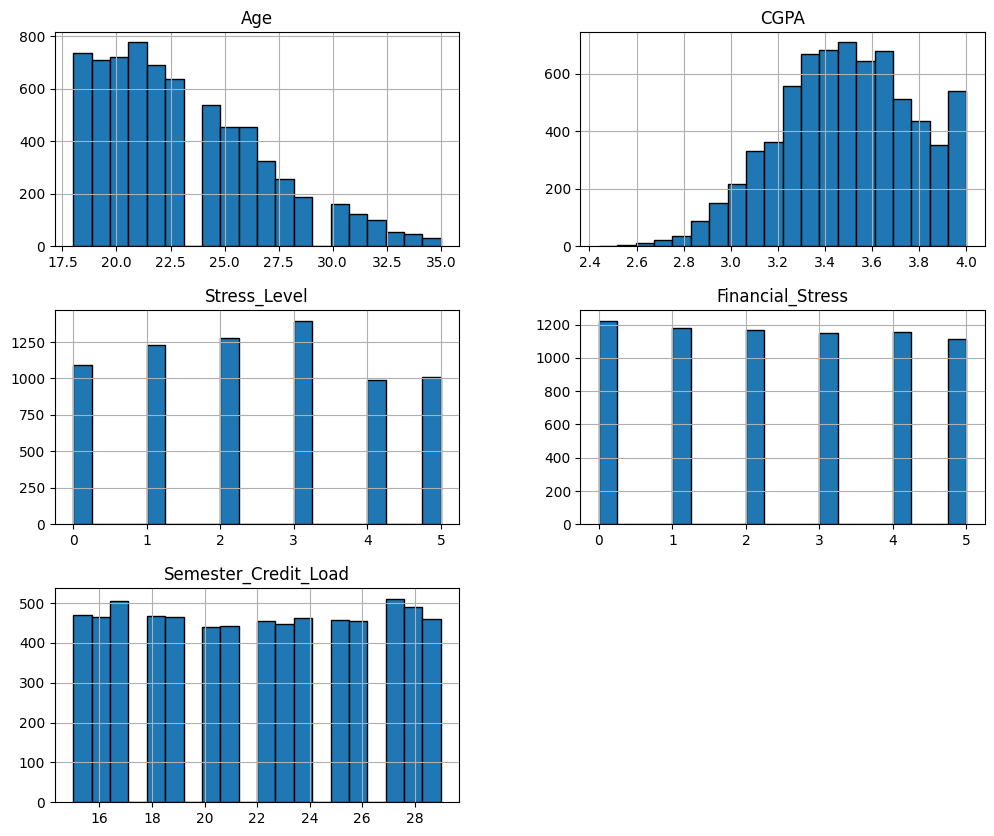

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_features = ['Age', 'CGPA', 'Stress_Level','Financial_Stress', 'Semester_Credit_Load']
data[numeric_features].hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.show()


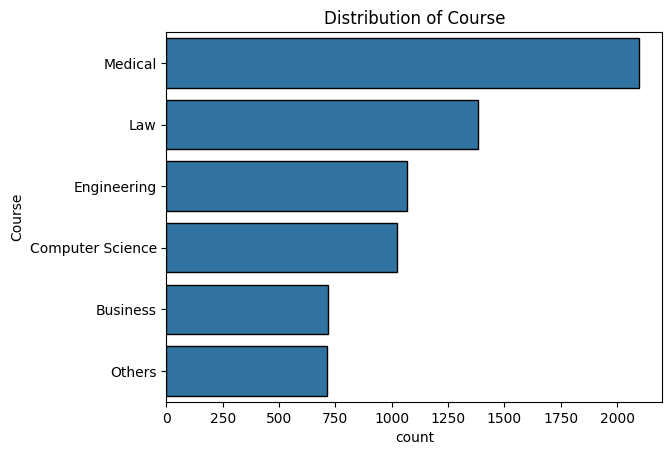

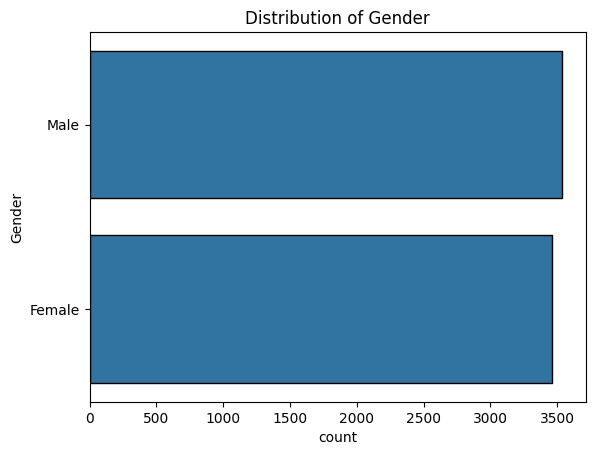

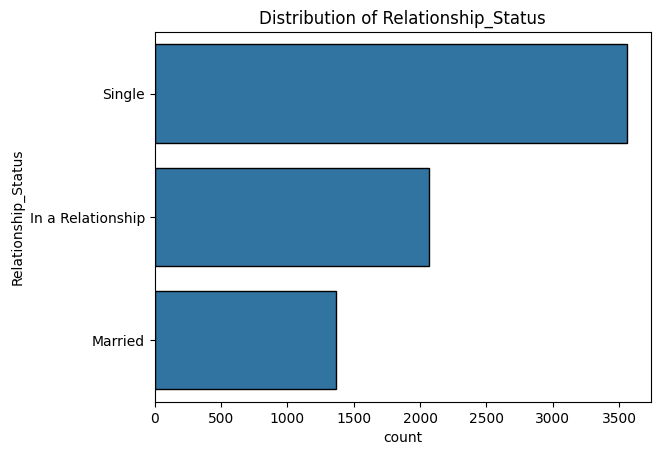

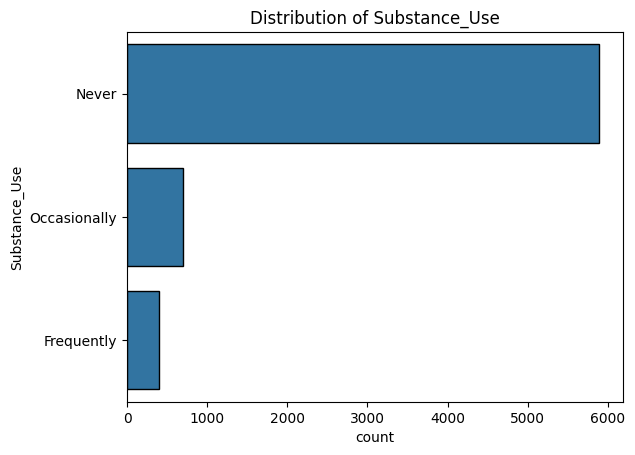

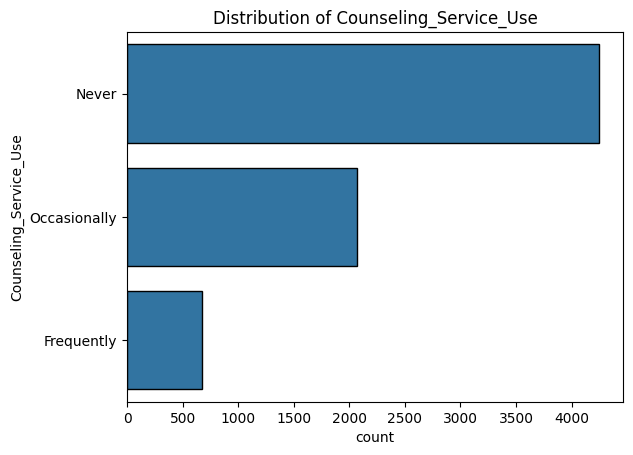

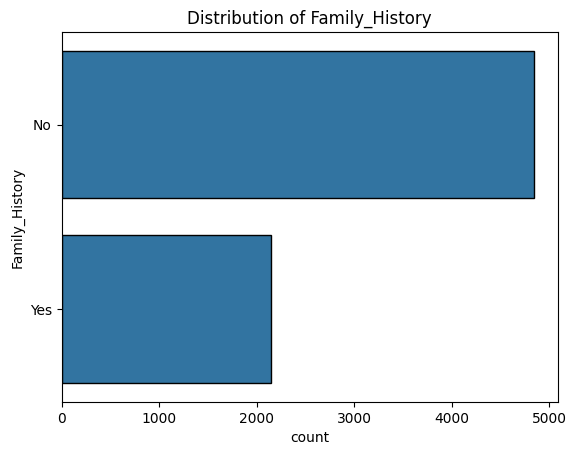

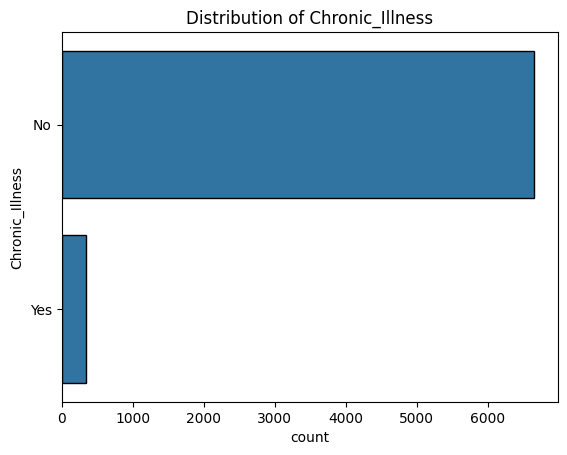

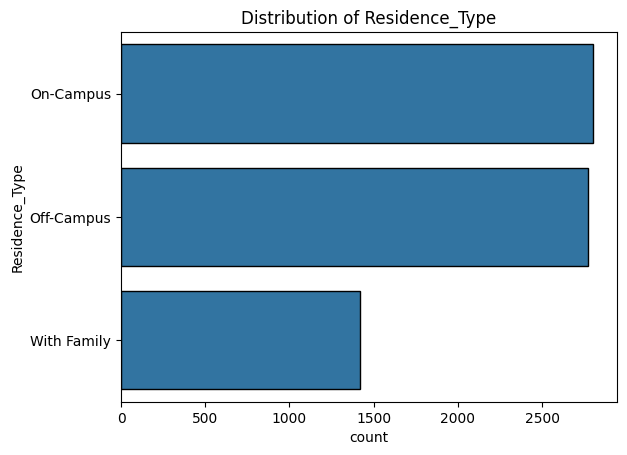

In [30]:
categorical_features = ['Course', 'Gender', 'Relationship_Status', 'Substance_Use', 'Counseling_Service_Use', 'Family_History', 'Chronic_Illness', 'Residence_Type']
for col in categorical_features:
    sns.countplot(y=data[col], order=data[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.show()


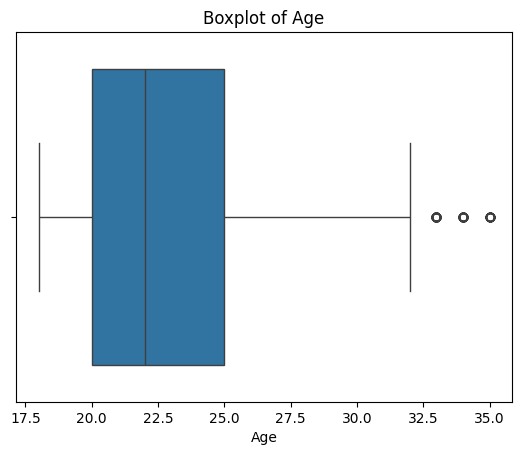

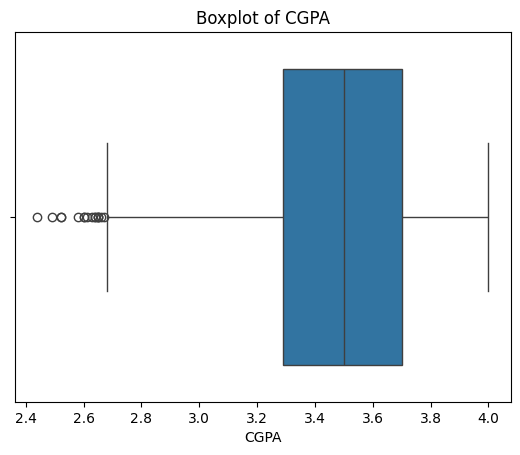

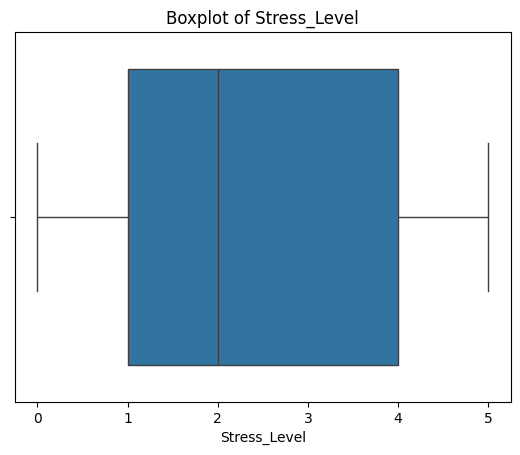

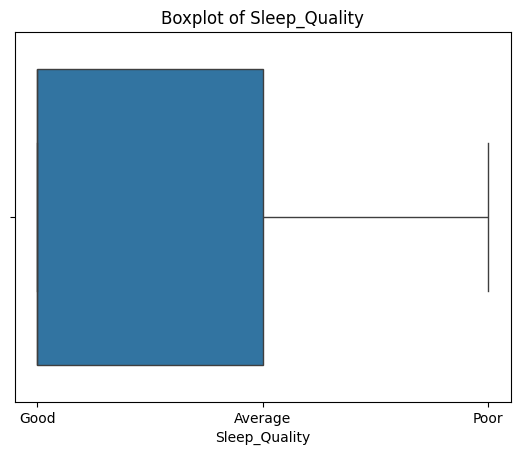

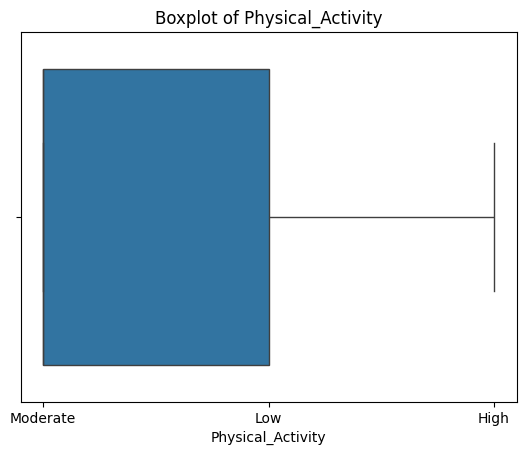

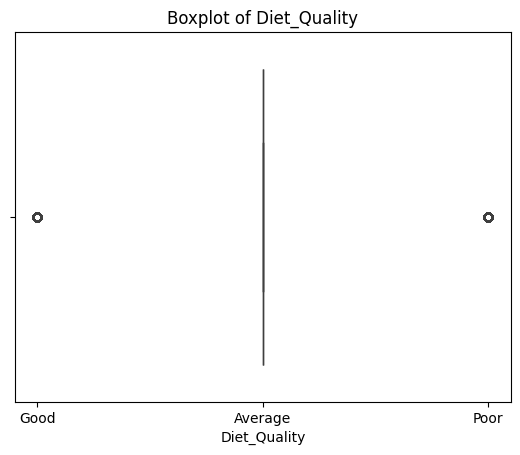

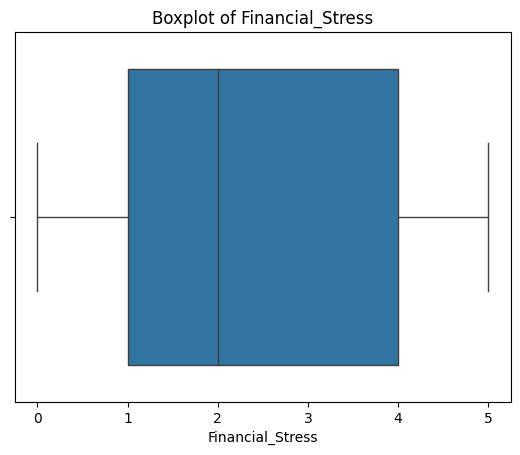

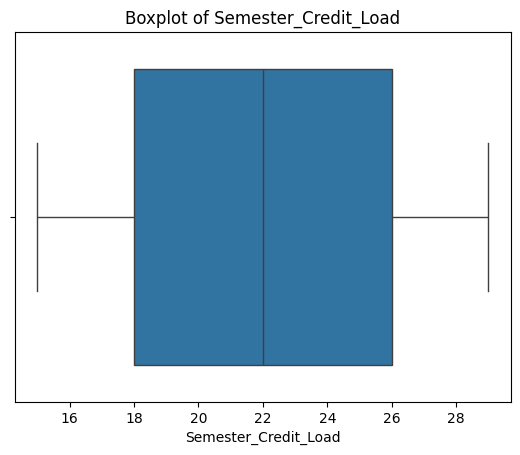

In [31]:
#detect outliers
for feature in numeric_features:
    sns.boxplot(x=data[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()


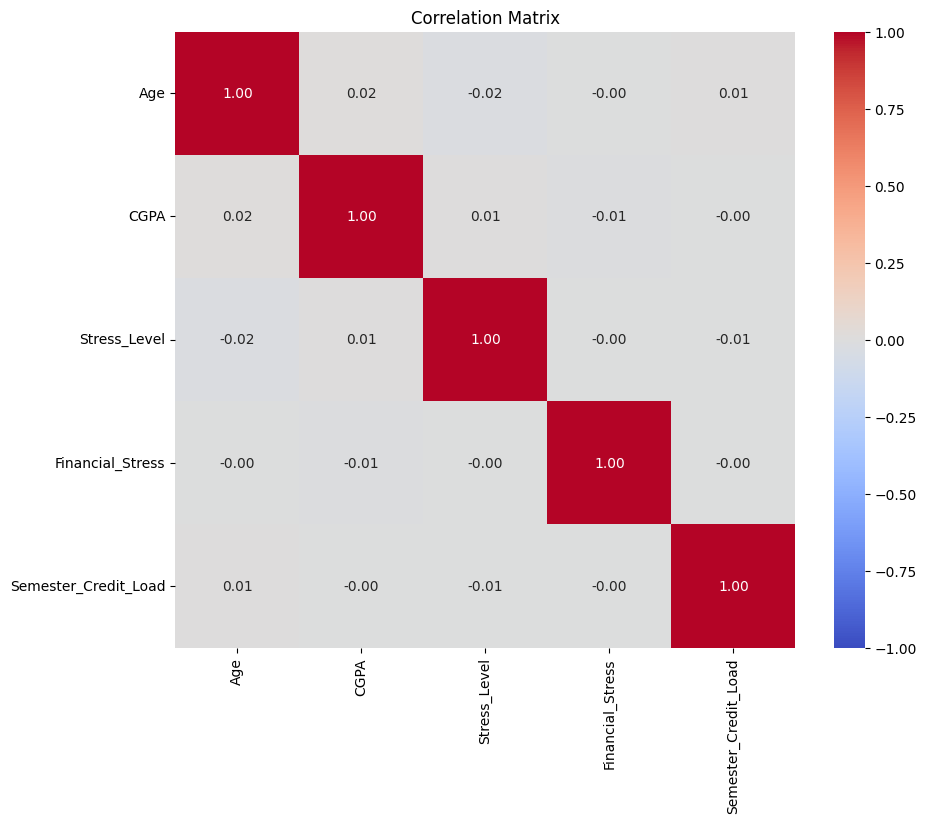

In [41]:

numeric_features = ['Age', 'CGPA', 'Stress_Level','Financial_Stress', 'Semester_Credit_Load']
corr = data[numeric_features].corr()


plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


In [35]:
pd.crosstab(data['Gender'], data['risk'], normalize='index')

risk,0,1
Gender,,
Female,0.557676,0.442324
Male,0.564762,0.435238
